In [24]:
import pandas as pd
import numpy as np
%matplotlib inline

In [25]:
pd.options.display.max_columns = 93
pd.options.display.max_rows = 40

aircraft = pd.read_csv("./data/aircraft.csv",
                                    encoding = "ISO-8859-1",
                                    sep=';')  
aircraft = aircraft.drop_duplicates('ev_id')
aircraft = aircraft[ aircraft['far_part'] == '121']

far_121 = aircraft.where(aircraft['ev_id'])
#far_121.info()

aircraft['far_part'].value_counts()

C:\Users\jesus\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (4,7,17,27,28,32,37,38,47,48,53,63,70,72,73,76,82) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


121    2124
Name: far_part, dtype: int64

In [26]:
pd.options.display.max_columns = 8
pd.options.display.max_rows = 71

Occurrences = pd.read_csv("./data/Occurrences1.csv",
                                    sep=';')  
Occurrences.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140332 entries, 0 to 140331
Data columns (total 8 columns):
ev_id              140332 non-null object
Aircraft_Key       140332 non-null int64
Occurrence_No      140332 non-null int64
Occurrence_Code    140332 non-null int64
Phase_of_Flight    140332 non-null int64
Altitude           140332 non-null int64
lchg_date          139681 non-null object
lchg_userid        137311 non-null object
dtypes: int64(5), object(3)
memory usage: 9.6+ MB


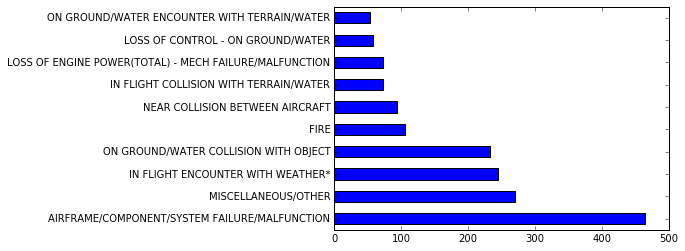

In [37]:
a = Occurrences['ev_id'].isin(far_121['ev_id'])
Occurrences_121 = Occurrences[a]
b = Occurrences_121['Occurrence_Code'].value_counts()
b = b[0:10]

Occurrences_dict = {171:'FIRE',
             250:'LOSS OF CONTROL - IN FLIGHT',
             260:'LOSS OF CONTROL - ON GROUND/WATER',
             280:'NEAR COLLISION BETWEEN AIRCRAFT',
             310:'ON GROUND/WATER COLLISION WITH OBJECT',
             320:'ON GROUND/WATER ENCOUNTER WITH TERRAIN/WATER',
             350:'LOSS OF ENGINE POWER (includes loss of power for unknown reason)',
             220:'IN FLIGHT COLLISION WITH OBJECT',
             130:'AIRFRAME/COMPONENT/SYSTEM FAILURE/MALFUNCTION',
             240:'IN FLIGHT ENCOUNTER WITH WEATHER*',
             230:'IN FLIGHT COLLISION WITH TERRAIN/WATER',
             430:'MISCELLANEOUS/OTHER',
             351:'LOSS OF ENGINE POWER(TOTAL) - MECH FAILURE/MALFUNCTION'}

b = b.rename_axis(Occurrences_dict)
b.plot.barh(stacked=True);
